In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Execute plot() inline without calling show()
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('./datasets/sms_spam_perceptron.csv')

y = df.iloc[:, 0].values
y = np.where(y == 'spam', -1, 1)

X = df.iloc[:, [1, 2]].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)


In [6]:
from sklearn.linear_model import Perceptron

p = Perceptron(max_iter=40, eta0=0.1, random_state=0)
p.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
y_pred = p.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 7
Accuracy: 0.77


In [15]:
!pip install mlxtend

     |████████████████████████████████| 1.4MB 1.2MB/s eta 0:00:01


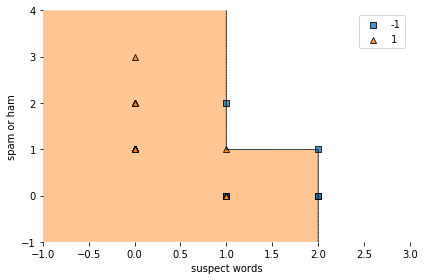

In [38]:
#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
from mlxtend.plotting import plot_decision_regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, clf=p)
plt.xlabel('suspect words')
plt.ylabel('spam or ham')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
